In [1]:
#import necessary libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [2]:
#get the current working director
print(os.getcwd())

C:\Users\user\AppData\Local\bipy\27825500\projects\d6d26c318ca54ba1889739c4d871f692


In [3]:
#import the excel file as it is
rating_2015 = pd.read_excel('1. 2015 Source File.xlsx')
rating_2016 = pd.read_excel('2016 Ratings.xlsx')

In [4]:
#look at the shape of the file downloaded
rating_2015.shape
print(rating_2015.columns)
print(rating_2016.columns)

Index(['Ticker', 'EBIT%', 'ROC%', 'Rev / Assets', 'EBITDA Cov', 'EBIT Cov',
       'Debt to EBITDA', 'Debt to EBIT', 'EBIT / Debt', 'CFO / Debt',
       'FCF / Debt', 'D/E', 'Net D/E', 'L Debt / Capital', 'Debt / Capital',
       'D/A', 'Op Marg%', 'CF Coverage', 'S&P', 'Fitch', 'Moody', 'S&P #',
       'Fitch #', 'Moody #', 'Avg Credit', 'Credit Score', 'Credit Score Vl',
       'Country', 'Exch', 'Sector', 'Ind Grp', 'Industry', 'Sub-Ind'],
      dtype='object')
Index(['Ticker', 'S&P LT LC', 'Fitch Sr Unsec Dbt Rtg',
       'Moody's Sr Unsec Debt'],
      dtype='object')


In [5]:
#Numeric Scale 1
map= {'AAA': 0, 'AA+': 1, 'AA':2 , 'AA-':3 , 'A+': 4, 'A':5, 'A-': 6,  'BBB+':7 , 'BBB':8,'BBBpi':8 ,'BBB-':9,'BB+':10,'BB':11,'BBpi':11,'BB-':12,'B+':13,'B':14,'B-':15, 'CCC+': 16, 'CCC':17, 'CCC-':18, 'CC':19, 'D':20, 'NRpi':100,'NR':100, 'nan' :100, 'WD':100,'R':100}

In [6]:
#Numeric Scale 2
map_moodys= {'Aaa': 0, 'Aa1+': 1, 'Aa2':2 , 'Aa3':3 , 'A1': 4, 'A2':5, 'A3': 6,  'Baa1':7 , 'Baa2':8, 'Baa3':9,'Ba1':10,'Ba2':11, 'Ba3':12,'B1':13,'B2':14,'B3':15, 'Caa1': 16, 'Caa2':17, 'Caa3':18, 'Ca':19, 'C':19, 'WR':100,'NR':100, 'nan' :100, 'R':100}

In [7]:

rating_2015['SP_Score'] = rating_2015['S&P'].map(map)
rating_2016['SP_Score'] = rating_2016['S&P LT LC'].map(map)

In [8]:
rating_2015['Moodys_Score'] = rating_2015['Moody'].map(map_moodys)
rating_2016['Moodys_Score'] = rating_2016["Moody's Sr Unsec Debt"].map(map_moodys)

In [9]:
rating_2015['Fitch_Score'] = rating_2015['Fitch'].map(map)
rating_2016['Fitch_Score'] = rating_2016['Fitch Sr Unsec Dbt Rtg'].map(map)

In [10]:
df_2015 = rating_2015[['Ticker', 'EBIT%', 'ROC%', 'Rev / Assets', 'EBITDA Cov', 'EBIT Cov',
       'Debt to EBITDA', 'Debt to EBIT', 'EBIT / Debt', 'CFO / Debt',
       'FCF / Debt', 'D/E', 'Net D/E', 'L Debt / Capital', 'Debt / Capital',
       'D/A', 'Op Marg%', 'CF Coverage', 'SP_Score', 'Fitch_Score', 'Moodys_Score',
       'Country', 'Exch', 'Sector', 'Ind Grp', 'Industry', 'Sub-Ind']]

Main rating Frame

In [11]:
#2015 data plus 2016 rating
rating_main = pd.merge(df_2015, rating_2016[['Ticker','SP_Score','Fitch_Score','Moodys_Score']], left_on='Ticker', right_on = 'Ticker', how='left')

In [12]:
rating_main.isnull().sum()

Ticker                 0
EBIT%               1103
ROC%                 422
Rev / Assets          94
EBITDA Cov          1034
EBIT Cov            1130
Debt to EBITDA      1032
Debt to EBIT         580
EBIT / Debt          863
CFO / Debt           367
FCF / Debt           223
D/E                  347
Net D/E              228
L Debt / Capital     278
Debt / Capital       210
D/A                  189
Op Marg%             113
CF Coverage         1136
SP_Score_x           331
Fitch_Score_x       2690
Moodys_Score_x      1907
Country                0
Exch                   0
Sector               166
Ind Grp              166
Industry             166
Sub-Ind              166
SP_Score_y           538
Fitch_Score_y       2722
Moodys_Score_y      2011
dtype: int64

In [13]:
def fill_na(df):
    list_of_cols = df.isnull().sum()[df.isnull().sum() != 0].index.to_list
    for x in list_of_cols():
        df[x]  = df[x].fillna(df[x].mode()[0])

In [14]:
fill_na(rating_main)

<AxesSubplot:>

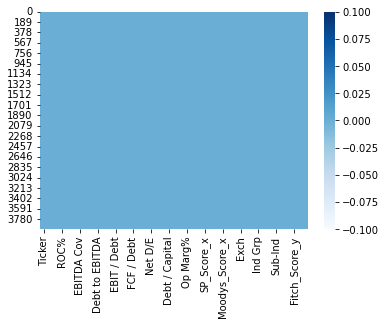

In [15]:
sns.heatmap(rating_main.isnull(),cmap='Blues')

In [16]:
rating_main.columns

Index(['Ticker', 'EBIT%', 'ROC%', 'Rev / Assets', 'EBITDA Cov', 'EBIT Cov',
       'Debt to EBITDA', 'Debt to EBIT', 'EBIT / Debt', 'CFO / Debt',
       'FCF / Debt', 'D/E', 'Net D/E', 'L Debt / Capital', 'Debt / Capital',
       'D/A', 'Op Marg%', 'CF Coverage', 'SP_Score_x', 'Fitch_Score_x',
       'Moodys_Score_x', 'Country', 'Exch', 'Sector', 'Ind Grp', 'Industry',
       'Sub-Ind', 'SP_Score_y', 'Fitch_Score_y', 'Moodys_Score_y'],
      dtype='object')

In [17]:
rating_main['SP_IG/HY'] = [1 if x <= 9 else 0 for x in rating_main['SP_Score_x'] ]

In [18]:
X = rating_main[['EBIT%', 'ROC%', 'Rev / Assets', 'EBITDA Cov', 'EBIT Cov',
       'Debt to EBITDA', 'Debt to EBIT', 'EBIT / Debt', 'CFO / Debt',
       'FCF / Debt', 'D/E', 'Net D/E', 'L Debt / Capital', 'Debt / Capital',
       'D/A', 'Op Marg%', 'CF Coverage','Country', 'Exch', 'Sector', 'Ind Grp', 'Industry',
       'Sub-Ind']]
y = rating_main['SP_IG/HY']

In [19]:
X = pd.get_dummies(X,columns = ['Country', 'Exch', 'Sector', 'Ind Grp', 'Industry',
       'Sub-Ind'], drop_first=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42, stratify = y)

In [21]:
y_train.value_counts(normalize=True)

0    0.602337
1    0.397663
Name: SP_IG/HY, dtype: float64

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       788
           1       0.67      0.59      0.63       519

    accuracy                           0.72      1307
   macro avg       0.71      0.70      0.70      1307
weighted avg       0.72      0.72      0.72      1307



C:\blp\bqnt\environments\bqnt-3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\blp\bqnt\environments\bqnt-3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


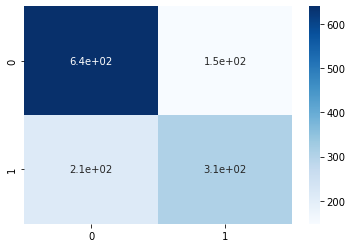

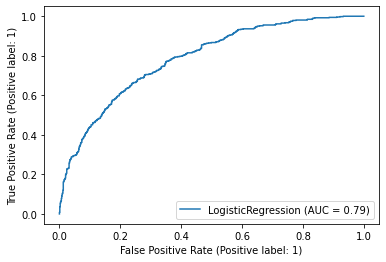

In [22]:
# first Model: Logistic Regression

log = LogisticRegression(max_iter=10000)
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
y_pred_proba = log.predict_proba(X_test)
print(classification_report(y_test, y_pred_log))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, cmap='Blues')

plot_roc_curve(log,X_test, y_test)

0.7636662758057066
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       788
           1       0.73      0.67      0.70       519

    accuracy                           0.77      1307
   macro avg       0.76      0.75      0.76      1307
weighted avg       0.77      0.77      0.77      1307



C:\blp\bqnt\environments\bqnt-3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


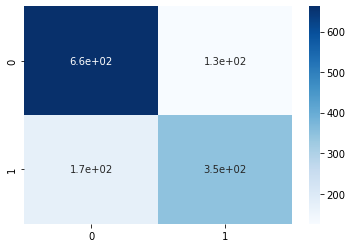

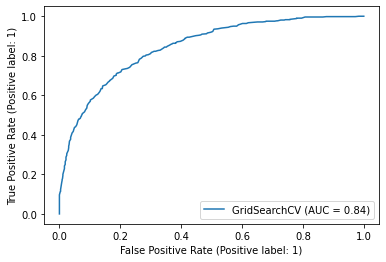

In [23]:
# Trying Random Forest Classifier
RandomForest= RandomForestClassifier()
RandomForest_params = {
    'n_estimators': [100,150,200,300,400],
    'max_depth' : [None, 1,2,3,4,5]
}
gs = GridSearchCV(RandomForest,param_grid=RandomForest_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)

y_pred = gs.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

plot_roc_curve(gs, X_test,y_test)

In [24]:
gs.best_params_


{'max_depth': None, 'n_estimators': 200}

In [25]:
xg = RandomForestClassifier(max_depth=None, n_estimators=200)
xg.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [26]:
Feature_scores = pd.Series(xg.feature_importances_, index=X_train.columns).sort_values(ascending=False)
Feature_scores_20 = Feature_scores.nlargest(n=20, keep='first')

[Text(0, 0, 'Op Marg%'),
 Text(1, 0, 'Rev / Assets'),
 Text(2, 0, 'ROC%'),
 Text(3, 0, 'CF Coverage'),
 Text(4, 0, 'L Debt / Capital'),
 Text(5, 0, 'FCF / Debt'),
 Text(6, 0, 'D/A'),
 Text(7, 0, 'Net D/E'),
 Text(8, 0, 'CFO / Debt'),
 Text(9, 0, 'EBIT / Debt'),
 Text(10, 0, 'EBITDA Cov'),
 Text(11, 0, 'Debt to EBIT'),
 Text(12, 0, 'EBIT Cov'),
 Text(13, 0, 'Debt / Capital'),
 Text(14, 0, 'D/E'),
 Text(15, 0, 'EBIT%'),
 Text(16, 0, 'Debt to EBITDA'),
 Text(17, 0, 'Country_JP'),
 Text(18, 0, 'Country_US'),
 Text(19, 0, 'Sector_Utilities')]

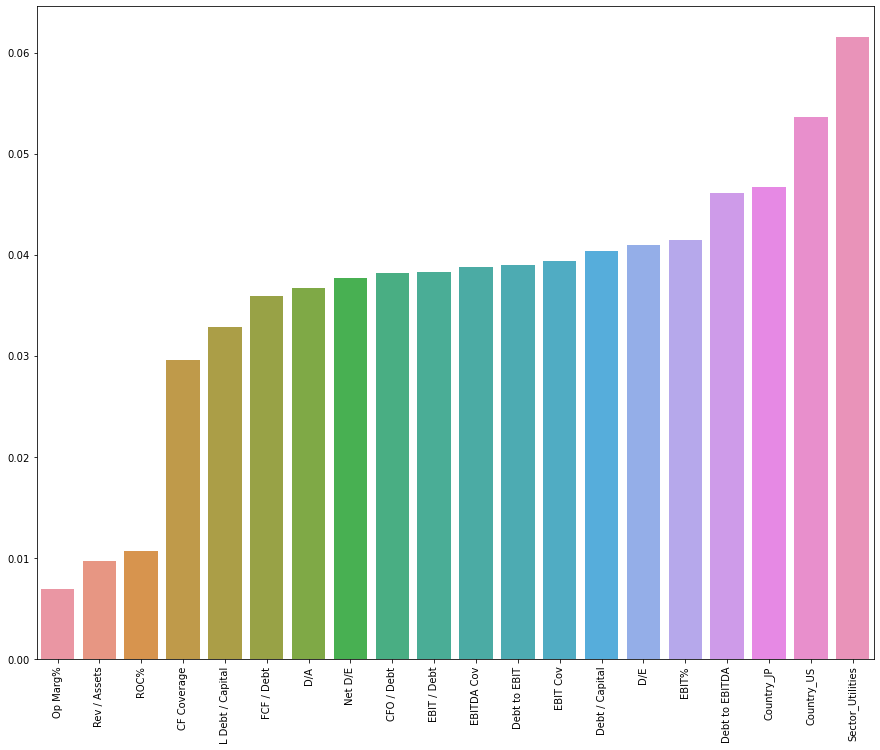

In [27]:
f, ax = plt.subplots(figsize=(15,12))
ax = sns.barplot(x=Feature_scores_20, y = Feature_scores_20.index, data = Feature_scores_20)
ax.set_xticklabels(Feature_scores_20.index,rotation=90)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred_knn = neigh.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues')